# Exploratory Data Analysis (EDA)

What to Look For:

- **Dataset size:** Do you have enough data? (Generally want 100+ samples).
- **Feature types:** Which columns are numbers vs text/categories?
- **Missing values:** Are there empty cells in your data?
- **Data ranges:** Do the numbers make sense for what they represent?

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

## Essential Dataset Overview Steps

In [326]:
# Basic dataset information
print("Dataset Shape:", X_train.shape)  # (rows, columns)
print("Number of features:", len(X_train.columns))
print("Number of samples:", len(X_train))

# Look at the first few rows
print(X_train.head())

# Get basic info about each column
print(X_train.info())

# Basic statistics for numerical columns
print(X_train.describe())

Dataset Shape: (8000, 16)
Number of features: 16
Number of samples: 8000
   squareMeters  numberOfRooms  hasYard  hasPool    floors  cityCode  \
0      0.647650       0.122449     -1.0      1.0 -0.941176  0.050487   
1      0.590466       0.755102     -1.0      0.0  0.568627  0.555024   
2      0.575618       0.408163      0.0      1.0  0.901961 -0.218090   
3     -0.696256      -0.530612      0.0      0.0  0.098039 -0.659215   
4     -0.952297       0.163265     -1.0      0.0  0.882353 -0.292601   

   cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0            0.2           -0.8 -0.941176         0.0                0.0   
1            0.2            0.2 -0.882353         1.0                1.0   
2            0.8            1.0 -0.941176         1.0                1.0   
3           -1.0            0.4  0.058824         0.0                1.0   
4            0.0            0.2 -0.117647         1.0                1.0   

   basement     attic    garage  hasS

## Quick Quality Checks

In [327]:
# Check for missing values
missing_data = X_train.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Check data types
print("\nData types:")
print(X_train.dtypes)

# Look for duplicate rows
duplicates = X_train.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Missing values per column:
Series([], dtype: int64)

Data types:
squareMeters         float64
numberOfRooms        float64
hasYard              float64
hasPool              float64
floors               float64
cityCode             float64
cityPartRange        float64
numPrevOwners        float64
made                 float64
isNewBuilt           float64
hasStormProtector    float64
basement             float64
attic                float64
garage               float64
hasStorageRoom       float64
hasGuestRoom         float64
dtype: object

Duplicate rows: 0


## Basic target statistics

**What to Look For:**

- Shape of distribution: Is it bell-shaped (normal) or skewed?
- Range: Are the values what you'd expect?
- Outliers: Are there extremely high or low values?
- Zeros or negatives: Do these make sense for your problem?

**Common Target Patterns:**

- Normal distribution: Bell-shaped, mean ≈ median (good for linear models).
- Right-skewed: Long tail on the right, mean > median (common for prices, counts).
- Left-skewed: Long tail on the left, mean < median (less common).
- Bimodal: Two peaks (might indicate two different groups).

In [328]:
print("Target Variable Analysis:")
print(f"Mean: {y_train.mean()}")
print(f"Median: {y_train.median()}")
print(f"Standard Deviation: {y_train.std()}")
print(f"Minimum: {y_train.min()}")
print(f"Maximum: {y_train.max()}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

Target Variable Analysis:
Mean: price    4.964092e+06
dtype: float64
Median: price    4987189.3
dtype: float64
Standard Deviation: price    2.855775e+06
dtype: float64
Minimum: price    10313.5
dtype: float64
Maximum: price    9998411.0
dtype: float64
Missing values: price    0
dtype: int64


## Visualizing your target

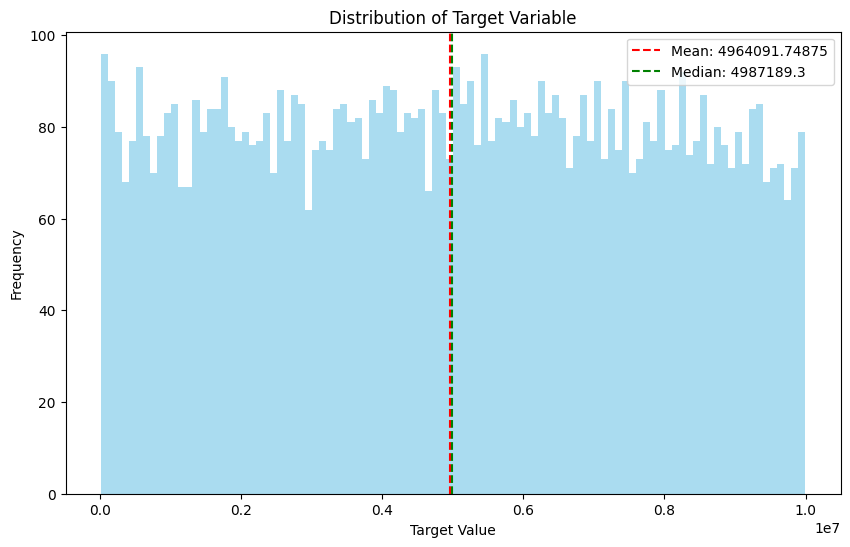

In [329]:
# Create a simple histogram
plt.figure(figsize=(10, 6))
plt.hist(y_train['price'], bins=100, alpha=0.7, color="skyblue")
plt.axvline(
    y_train['price'].mean(),
    color="red",
    linestyle="--",
    label=f"Mean: {y_train['price'].mean()}",
)
plt.axvline(
    y_train['price'].median(),
    color="green",
    linestyle="--",
    label=f"Median: {y_train['price'].median()}",
)
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.legend()
plt.show()

## Understanding Your Target Variable - What Am I Trying to Predict?

Your target variable is the heart of your regression problem - it's what you're trying to predict. Understanding its distribution, range, and characteristics is crucial because these properties directly influence your choice of algorithms, preprocessing steps, and evaluation metrics.

**Key Target Characteristics to Analyze:**

- **Distribution shape:** Is it bell-shaped (normal), skewed, or has multiple peaks?
- **Range and scale:** What are the minimum, maximum, and typical values?
- **Outliers:** Are there extreme values that might represent errors or special cases?
- **Missing values:** Any gaps in your target that need addressing?

            price
count     8000.00
mean   4964091.75
std    2855774.60
min      10313.50
25%    2511409.20
50%    4987189.30
75%    7405851.85
max    9998411.00


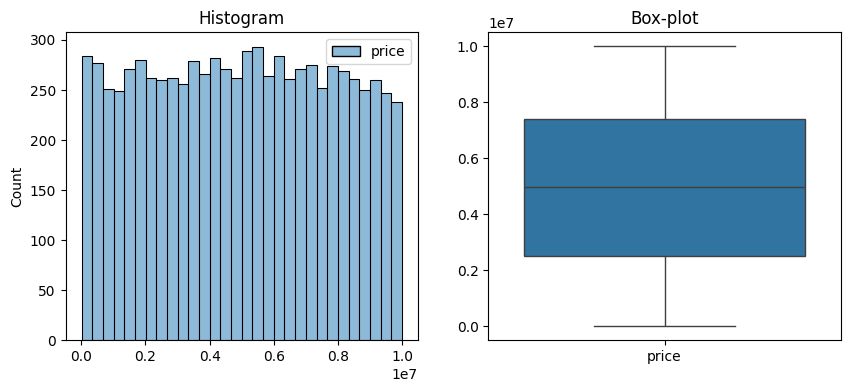

In [330]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(y_train, ax=ax[0], bins=30)
ax[0].set_title("Histogram")
sns.boxplot(y_train, ax=ax[1])
ax[1].set_title("Box-plot")
print(y_train.describe().round(2))

## Numerical Features – Fast Stats & Distributions

Numeric stats:
                    mean   std   min   max
squareMeters      -0.00  0.58 -1.02  1.02
numberOfRooms     -0.01  0.59 -1.02  1.00
hasYard           -0.49  0.50 -1.00  0.00
hasPool            0.50  0.50  0.00  1.00
floors             0.00  0.57 -0.96  0.98
cityCode          -0.01  0.57 -1.01  0.98
cityPartRange     -0.10  0.58 -1.00  0.80
numPrevOwners      0.10  0.57 -0.80  1.00
made              -0.03  0.55 -0.94  0.88
isNewBuilt         0.50  0.50  0.00  1.00
hasStormProtector  0.50  0.50  0.00  1.00
basement          -0.02  0.58 -1.04  0.98
attic             -0.01  0.58 -1.00  0.98
garage             0.00  0.58 -0.99  1.00
hasStorageRoom     0.50  0.50  0.00  1.00
hasGuestRoom      -0.00  0.53 -0.83  0.83


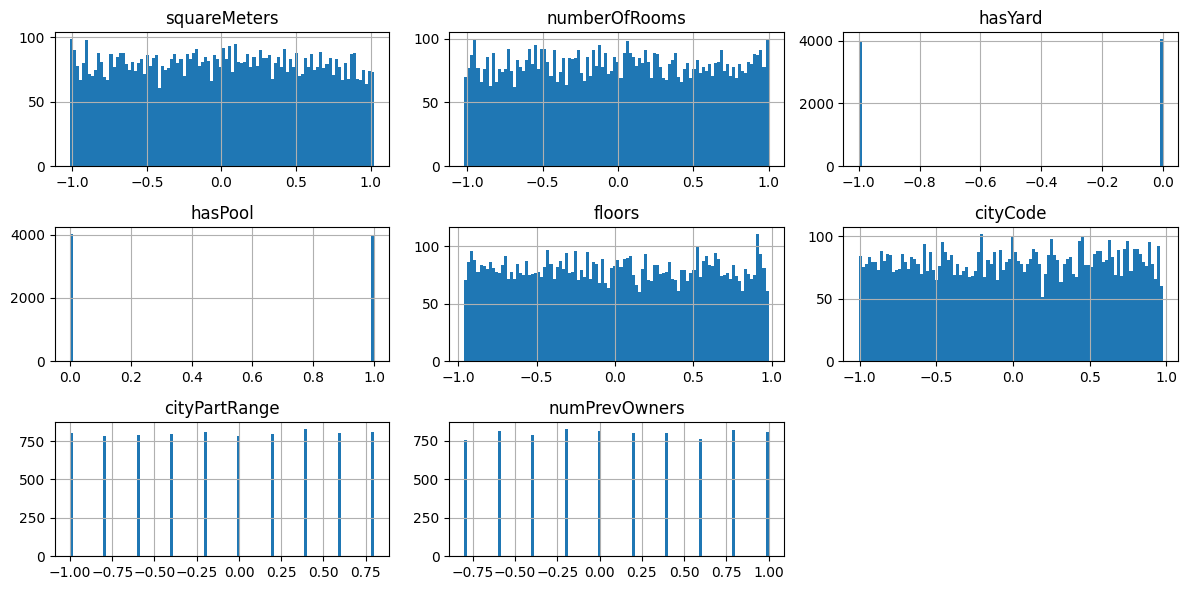

In [331]:
num_cols = X_train.select_dtypes("number").columns
print(
    "Numeric stats:\n",
    X_train[num_cols].describe().T[["mean", "std", "min", "max"]].round(2),
)
# Plot first 4 histograms*
X_train[num_cols[:8]].hist(bins=100, figsize=(12, 6))
plt.tight_layout()
plt.show()

## Numeric ↔ Target Correlation

The correlation between numerical features and your target variable reveals which features are likely to be useful predictors. This analysis helps you prioritize which features to focus on during modeling and identifies potential star performers that might drive your model's success.

**Understanding Correlation Strength:**

- |r| > 0.7: Very strong relationship - likely excellent predictor.
- 0.3 < |r| < 0.7: Moderate relationship - good predictor candidate.
- 0.1 < |r| < 0.3: Weak relationship - might be useful in combination.
- |r| < 0.1: Very weak relationship - consider removing.

Top correlations:
 squareMeters      1.000
garage           -0.018
hasPool          -0.017
numPrevOwners     0.015
hasStorageRoom   -0.012
isNewBuilt       -0.010
cityPartRange     0.008
made             -0.007
numberOfRooms     0.006
hasYard           0.005
dtype: float64


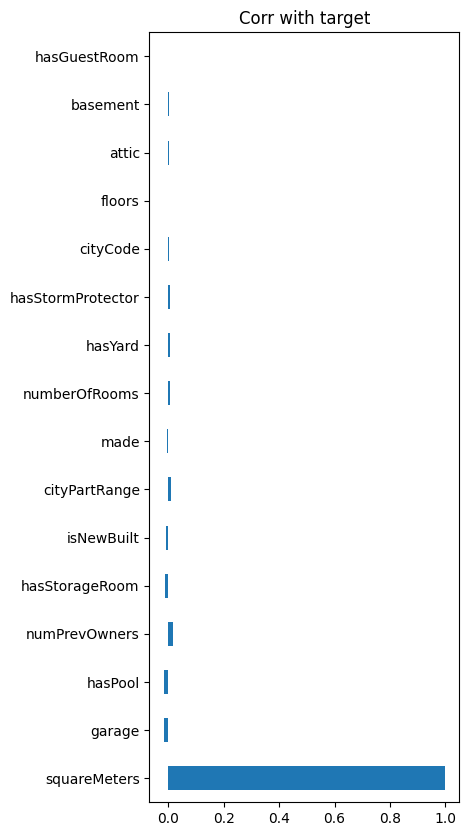

In [332]:
correlations = (
    X_train
    .corrwith(y_train["price"])
    .sort_values(key=abs, ascending=False)
)
print("Top correlations:\n", correlations.head(10).round(3))
correlations.head(16).plot.barh(figsize=(4, 10))
plt.title("Corr with target")
plt.show()

## Categorical Features – Frequency & Target Mean

**Key Categorical Analysis Elements:**

- **Cardinality:** How many unique categories exist.
- **Frequency distribution:** Which categories are common vs rare.
- **Target differences:** How much the target varies across categories.
- **Missing patterns:** Whether missing categorical data follows any pattern.

In [333]:
# No categorical columns left since they are already transformed above
cat_cols = X_train.select_dtypes("object").columns

for col in cat_cols:
    if X_train[col].nunique() <= 500:
        df = X_train.assign(target=y_train)
        summary = (
            df.groupby(col)["target"]
            .agg(["count", "mean"])
            .sort_values(by="count", ascending=False)
        )
        print(f"\n{col}:\n", summary)
        summary["mean"].plot.bar(figsize=(6, 3))
        plt.title(f"{col}→target")
        plt.show()

## Missing-Data Map

**Types of Missing Data Patterns:**

- **Random missing:** Scattered gaps with no clear pattern.
- **Systematic missing:** Missing values concentrated in specific rows/columns.
- **Informative missing:** Absence indicates something meaningful (e.g., "income" missing for unemployed people).

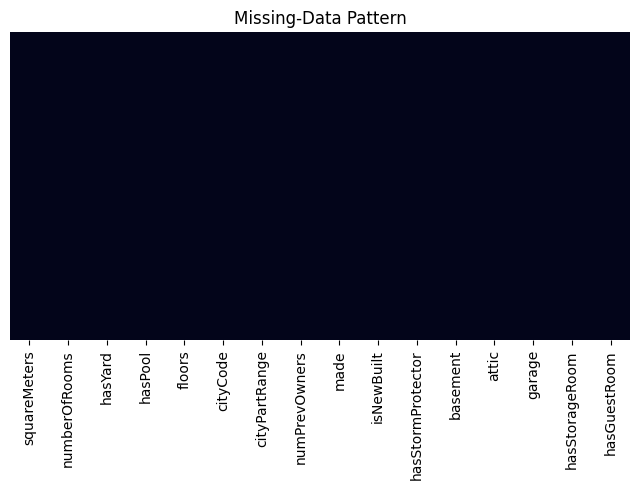

In [334]:
plt.figure(figsize=(8, 4))
sns.heatmap(X_train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing-Data Pattern")
plt.show()

# Outlier Detection (IQR Rule)

Why Outliers Matter:

- **Model sensitivity:** Linear models are heavily influenced by extreme values.
- **Scale distortion:** Outliers can make normal data appear compressed.
- **Feature engineering impact:** Scaling and transformation decisions affected by extremes.

In [335]:
def iqr_outliers(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    return s[(s < q1 - 1.5 * iqr) | (s > q3 + 1.5 * iqr)]


for col in num_cols[:20]:
    outs = iqr_outliers(X_train[col])
    print(f"{col}: {len(outs)} outliers ({len(outs)/len(X_train)*100:.1f}%)")

squareMeters: 0 outliers (0.0%)
numberOfRooms: 0 outliers (0.0%)
hasYard: 0 outliers (0.0%)
hasPool: 0 outliers (0.0%)
floors: 0 outliers (0.0%)
cityCode: 0 outliers (0.0%)
cityPartRange: 0 outliers (0.0%)
numPrevOwners: 0 outliers (0.0%)
made: 0 outliers (0.0%)
isNewBuilt: 0 outliers (0.0%)
hasStormProtector: 0 outliers (0.0%)
basement: 0 outliers (0.0%)
attic: 0 outliers (0.0%)
garage: 0 outliers (0.0%)
hasStorageRoom: 0 outliers (0.0%)
hasGuestRoom: 0 outliers (0.0%)


## Feature Multicollinearity - Avoiding Redundancy

Why Multicollinearity Matters:

- **Model instability:** Small data changes can cause large coefficient changes.
- **Interpretation difficulty:** Hard to isolate individual feature effects.
- **Computational waste:** Processing redundant information.
- **Overfitting risk:** More parameters than necessary for the same predictive power.

In [336]:
corr_mat = X_train[num_cols].corr().abs()
high_corr = np.where((corr_mat > 0.8) & (corr_mat < 1.0))
pairs = [
    (num_cols[i], num_cols[j], corr_mat.iat[i, j]) for i, j in zip(*high_corr) if i < j
]
print("High-corr pairs:", pairs[:5])

High-corr pairs: []


## EDA Summary Dashboard - Key Insights at a Glance

In [337]:
print("🚀 EDA SNAPSHOT")
print(f"Target skew: {y_train.skew()}")
print("Strongest predictor:", correlations.index[0], correlations.max().round(3))
miss = (X_train.isnull().mean() * 100).sort_values(ascending=False).head(3)
print("Top missing cols:\n", miss.round(1))
print("High-corr pairs:", pairs[:3])

🚀 EDA SNAPSHOT
Target skew: price    0.001662
dtype: float64
Strongest predictor: squareMeters 1.0
Top missing cols:
 squareMeters     0.0
numberOfRooms    0.0
hasYard          0.0
dtype: float64
High-corr pairs: []
